## 20 - OpenStreetMap
>Use OpenStreetMap data to create something. OpenStreetMap offers rich, editable data from roads to buildings and beyond. The goal is to showcase the power of this community-driven dataset. 🗺️📍

In [49]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_manager.fontManager.addfont('../../../../../fonts/Borel/Borel-Regular.ttf')


In [40]:
aoi = ox.geocode_to_gdf('Paris')

p = ox.features_from_polygon(aoi.loc[0,'geometry'],
                             tags={'capital':'yes'}).loc['node'].reset_index()

crs = p.estimate_utm_crs()
p = p.to_crs(crs)

trees = ox.features_from_polygon(p.buffer(1000).to_crs(4326)[0],
                                 tags={'natural': 'tree'}).to_crs(crs)

c:\Users\s1759665\AppData\Local\miniforge-pypy3\envs\mapping\Lib\site-packages\pyproj\transformer.py:819: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(


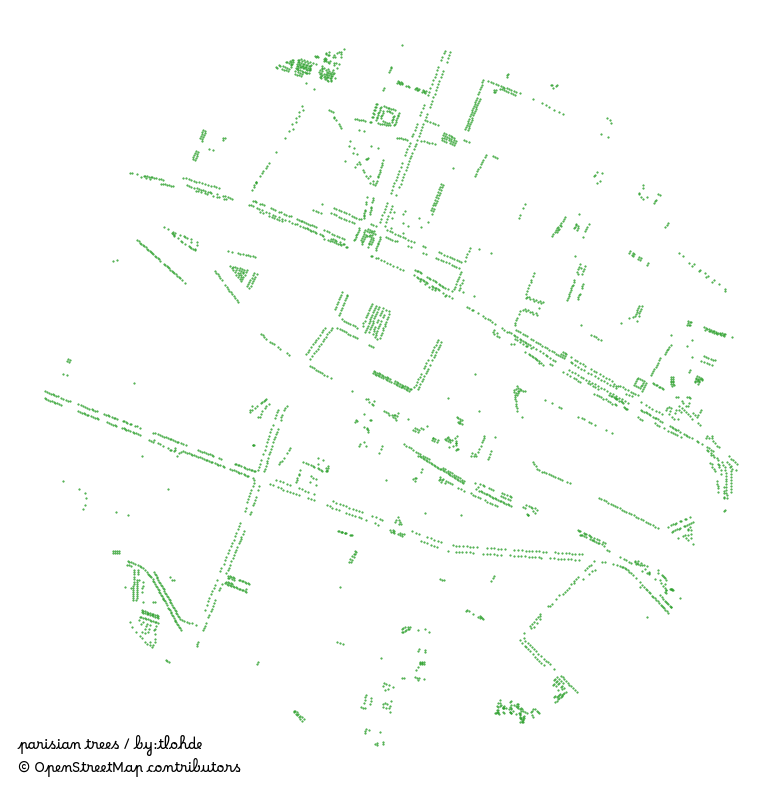

In [54]:
fig, ax = plt.subplots(subplot_kw={'aspect':'equal'}, figsize=[10,10])

trees.plot(ax=ax, marker='.', markersize=1, color='tab:green')
ax.set_axis_off()

ax.annotate('parisian trees / by:tlohde\n© OpenStreetMap contributors',
            xy=(0.01, 0.01),
            xycoords='axes fraction',
            font='Borel',
            fontsize=10)

fig.savefig('day20.png', dpi=300, bbox_inches='tight')